In [1]:
# !pip install --upgrade tsfresh

In [13]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sktime.datasets import load_arrow_head, load_basic_motions
# from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [7]:
h = load_arrow_head()
# print(h.head(10))
X, y = load_arrow_head(return_X_y=True)
print(X)

                                                 dim_0
0    0     -1.9630
1     -1.9578
2     -1.9561
3   ...
1    0     -1.7746
1     -1.7740
2     -1.7766
3   ...
2    0     -1.8660
1     -1.8420
2     -1.8350
3   ...
3    0     -2.0738
1     -2.0733
2     -2.0446
3   ...
4    0     -1.7463
1     -1.7413
2     -1.7227
3   ...
..                                                 ...
170  0     -1.6251
1     -1.6230
2     -1.6261
3   ...
171  0     -1.6578
1     -1.6647
2     -1.6326
3   ...
172  0     -1.6033
1     -1.5874
2     -1.5774
3   ...
173  0     -1.7390
1     -1.7415
2     -1.7329
3   ...
174  0     -1.6307
1     -1.6299
2     -1.6206
3   ...

[211 rows x 1 columns]


In [8]:
print(y)

0      0
1      1
2      2
3      0
4      1
      ..
170    2
171    2
172    2
173    2
174    2
Length: 211, dtype: object


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(158, 1) (158,) (53, 1) (53,)


In [10]:

X_train.head()

,dim_0
115,0 -1.8902 1 -1.9045 2 -1.9043 3 ...
59,0 -1.9969 1 -2.0076 2 -2.0010 3 ...
31,0 -1.9608 1 -1.9304 2 -1.8643 3 ...
75,0 -1.7216 1 -1.7366 2 -1.7190 3 ...
155,0 -1.9946 1 -1.9933 2 -1.9733 3 ...


In [15]:
from sktime.transformers.series_as_features.summarize import TSFreshFeatureExtractor
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(X_train)
Xt.head()

/Users/denis/projects/tfs-covid19/venv/lib/python3.9/site-packages/sktime/transformers/series_as_features/summarize/_tsfresh.py:163: UserWarning: Found non-unique index, replaced with unique index.
  warn("Found non-unique index, replaced with unique index.")
Feature Extraction: 100%|██████████| 5/5 [00:13<00:00,  2.67s/it]


,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_0__fourier_entropy__bins_2,dim_0__fourier_entropy__bins_3,dim_0__fourier_entropy__bins_5,dim_0__fourier_entropy__bins_10,dim_0__fourier_entropy__bins_100,dim_0__permutation_entropy__dimension_3__tau_1,dim_0__permutation_entropy__dimension_4__tau_1,dim_0__permutation_entropy__dimension_5__tau_1,dim_0__permutation_entropy__dimension_6__tau_1,dim_0__permutation_entropy__dimension_7__tau_1
0,0.0,1.0,0.0,1.0,0.000045,249.998225,0.319421,0.005990,-0.000030,0.073774,...,0.081510,0.092513,0.092513,0.204643,1.153134,1.490591,2.271597,3.002039,3.515664,3.921543
1,0.0,0.0,0.0,1.0,-0.000223,249.999003,0.341776,0.004884,0.000024,-0.194770,...,0.081510,0.081510,0.127671,0.184769,1.226987,1.535460,2.355170,2.990719,3.530660,3.961005
2,0.0,0.0,0.0,1.0,0.000036,249.999736,0.334898,0.004265,0.000113,0.144620,...,0.046288,0.092513,0.127671,0.184769,0.945472,1.394891,2.028676,2.613186,3.107059,3.532757
3,0.0,0.0,0.0,1.0,0.000266,249.998008,0.323381,0.005002,-0.000072,0.060660,...,0.081510,0.081510,0.092513,0.173767,1.068106,1.417964,2.119343,2.697285,3.186104,3.608864
4,0.0,0.0,0.0,1.0,0.000616,250.000403,0.352349,0.005648,-0.000167,0.024813,...,0.081510,0.092513,0.092513,0.204643,1.149982,1.463628,2.231168,2.905745,3.498256,3.958876


In [16]:
classifier = make_pipeline(
    TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False),
    RandomForestClassifier(),
)

In [17]:
classifier.fit(X_train, y_train)

/Users/denis/projects/tfs-covid19/venv/lib/python3.9/site-packages/sktime/transformers/series_as_features/summarize/_tsfresh.py:163: UserWarning: Found non-unique index, replaced with unique index.
  warn("Found non-unique index, replaced with unique index.")
Feature Extraction: 100%|██████████| 5/5 [00:13<00:00,  2.68s/it]


Pipeline(steps=[('tsfreshfeatureextractor',
                 TSFreshFeatureExtractor(show_warnings=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [18]:
classifier.score(X_test, y_test)

/Users/denis/projects/tfs-covid19/venv/lib/python3.9/site-packages/sktime/transformers/series_as_features/summarize/_tsfresh.py:163: UserWarning: Found non-unique index, replaced with unique index.
  warn("Found non-unique index, replaced with unique index.")
Feature Extraction: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


0.7924528301886793

In [19]:
X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60, 6) (60,) (20, 6) (20,)


In [20]:
X_train.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
3,0 -1.088052 1 -1.088052 2 -0.683620 3...,0 0.183832 1 0.183832 2 -2.909047 3...,0 -0.260871 1 -0.260871 2 1.507042 3...,0 -0.284981 1 -0.284981 2 0.415486 3...,0 0.487397 1 0.487397 2 0.013317 3...,0 1.081329 1 1.081329 2 0.820319 3...
0,0 0.079106 1 0.079106 2 -0.903497 3...,0 0.394032 1 0.394032 2 -3.666397 3...,0 0.551444 1 0.551444 2 -0.282844 3...,0 0.351565 1 0.351565 2 -0.095881 3...,0 0.023970 1 0.023970 2 -0.319605 3...,0 0.633883 1 0.633883 2 0.972131 3...
25,0 -0.185181 1 -0.185181 2 -1.319727 3...,0 0.059288 1 0.059288 2 -1.194247 3...,0 0.250270 1 0.250270 2 0.418052 3...,0 0.154476 1 0.154476 2 0.047941 3...,0 0.167792 1 0.167792 2 -0.215733 3...,0 0.732428 1 0.732428 2 -0.050604 3...
27,0 -0.255266 1 -0.255266 2 -0.792226 3...,0 -0.154748 1 -0.154748 2 -1.176848 3...,0 -0.273293 1 -0.273293 2 -0.709993 3...,0 -0.050604 1 -0.050604 2 -0.237040 3...,0 0.015980 1 0.015980 2 -0.314278 3...,0 0.013317 1 0.013317 2 0.170456 3...
14,0 1.186069 1 1.186069 2 0.02547...,0 0.013225 1 0.013225 2 1.92628...,0 -0.377872 1 -0.377872 2 -1.253871 3...,0 0.367545 1 0.367545 2 0.221060 3...,0 -0.253020 1 -0.253020 2 -0.500714 3...,0 0.114525 1 0.114525 2 -0.173119 3...


In [21]:
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(X_train)
Xt.head()

/Users/denis/projects/tfs-covid19/venv/lib/python3.9/site-packages/sktime/transformers/series_as_features/summarize/_tsfresh.py:163: UserWarning: Found non-unique index, replaced with unique index.
  warn("Found non-unique index, replaced with unique index.")
Feature Extraction: 100%|██████████| 5/5 [00:21<00:00,  4.20s/it]


,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_5__fourier_entropy__bins_2,dim_5__fourier_entropy__bins_3,dim_5__fourier_entropy__bins_5,dim_5__fourier_entropy__bins_10,dim_5__fourier_entropy__bins_100,dim_5__permutation_entropy__dimension_3__tau_1,dim_5__permutation_entropy__dimension_4__tau_1,dim_5__permutation_entropy__dimension_5__tau_1,dim_5__permutation_entropy__dimension_6__tau_1,dim_5__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,1.0,1.0,-15.850238,9.885558,0.189084,0.008776,0.000000,-0.173755,...,0.399949,0.587228,0.800609,1.174565,2.571628,1.670317,2.754194,3.481094,3.956499,4.255568
1,0.0,0.0,0.0,1.0,-8.618429,10.629914,0.229193,-0.002871,-0.000061,-0.164268,...,0.320753,0.647776,1.124025,1.459587,3.130035,1.599592,2.614086,3.516918,4.094068,4.316511
2,1.0,0.0,0.0,1.0,54.455230,182.497205,0.921471,0.011501,0.006315,0.515937,...,0.096509,0.192626,0.261160,0.288342,1.148247,1.490467,2.391433,3.187255,3.750715,4.163070
3,1.0,1.0,0.0,1.0,54.248883,176.508713,0.979276,-0.009260,-0.000214,0.487162,...,0.165443,0.165443,0.192626,0.192626,1.168582,1.549961,2.471065,3.256517,3.803134,4.163467
4,1.0,0.0,0.0,1.0,572.652728,15899.872790,9.464065,0.145859,0.117438,10.569595,...,0.096509,0.192626,0.192626,0.356468,1.291345,1.580672,2.552210,3.404748,4.040921,4.395817


In [22]:
from sklearn.ensemble import RandomForestRegressor

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import ReducedTimeSeriesRegressionForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

y = load_airline()
y_train, y_test = temporal_train_test_split(y)

regressor = make_pipeline(
    TSFreshFeatureExtractor(show_warnings=False, disable_progressbar=True),
    RandomForestRegressor(),
)
forecaster = ReducedTimeSeriesRegressionForecaster(regressor, window_length=12)
forecaster.fit(y_train)

fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)

/Users/denis/projects/tfs-covid19/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/denis/projects/tfs-covid19/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/denis/projects/tfs-covid19/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

0.2655498642452444

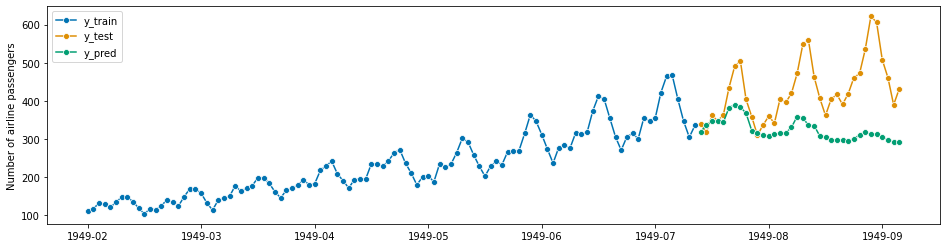

In [24]:
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import sMAPE, smape_loss

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

In [6]:
from covid19.datasets import RnboGovUa
from sktime.transformers.series_as_features.summarize import TSFreshFeatureExtractor
dataset = RnboGovUa()
df = dataset.prepare(metrics=dataset.metrics, country_filter=['Ukraine'])
# print(df.head(10))
# t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
# Xt = t.fit_transform(df)
# for date in df['date'].unuque():
#     print(date)

2021-02-05 18:15:35,286 INFO |covid19.datasets| Dataset range: 2020-03-01 00:00:00 - 2021-02-04 00:00:00


In [19]:
# print(df.head())
print(df.groupby('date').reset_index())

AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

In [7]:
y = df['delta_confirmed']
X = df.drop(columns=
    ['delta_deaths', 'delta_confirmed', 'delta_suspicion',
     'existing', 'confirmed', 'delta_existing',
     'suspicion', 'deaths', 'recovered', 'delta_recovered', 'country']
)

X['weekday'] = X['date'].dt.weekday

In [20]:
# regions_map = dict( enumerate(X.region.cat.categories) )
# unique_regions = X['region'].unique().tolist()
# X['region_id'] = X.region.cat.codes
X['region'] = X['region'].astype('category').cat.codes
X.drop(columns=['region'])

print(X.head())

NameError: name 'X' is not defined

In [ ]:
print(X.head())

In [59]:
from tsfresh import extract_features
extracted_features = extract_features(X, column_id="idx", column_sort="date")

Feature Extraction: 100%|██████████| 38/38 [00:06<00:00,  6.08it/s]


In [60]:
print(extracted_features)

     region__variance_larger_than_standard_deviation  \
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                1.0   
4                                                1.0   
..                                               ...   
336                                              1.0   
337                                              1.0   
338                                              1.0   
339                                              1.0   
340                                              1.0   

     region__has_duplicate_max  region__has_duplicate_min  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                     

In [62]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

AssertionError: X and y must contain the same number of samples.

In [37]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: delta_confirmed, dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6393, 5) (6393,) (2132, 5) (2132,)


In [39]:
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(X_train)
Xt.head()

ValueError: If passed as a pd.DataFrame, X must be a nested pd.DataFrame, with pd.Series or np.arrays inside cells.

In [4]:
from covid19.datasets import RnboGovUa
x, y = RnboGovUa().prepare_numpy(x_metrics=RnboGovUa.metrics, y_metrics={'delta_confirmed'})

2021-02-05 18:13:05,421 INFO |covid19.datasets| Dataset range: 2020-03-01 00:00:00 - 2021-02-04 00:00:00
/Users/denis/projects/tfs-covid19/src/covid19/datasets.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df.country.cat.codes
/Users/denis/projects/tfs-covid19/src/covid19/datasets.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df.region.cat.codes
/Users/denis/projects/tfs-covid19/src/covid19/datasets.py:159: SettingWithCopyWarning: 
A value is trying to be set o

In [5]:
print(len(y))

341
